<a href="https://colab.research.google.com/github/cjvilla/Gold-Projections/blob/main/Code/Keras_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Gold-Projections/celine-work/datetime_gold_predictions.csv')
data = data.drop(columns=['Unnamed: 0'])
data.head()

,Date,Inflation_Value,dollar_index,us_dollar,pound,indian_rupee,south_african_rand,australian_dollar
0,01/1979,9.3,86.239,227.290909,113.327273,1852.859091,197.018182,198.600000
1,02/1979,9.9,87.082,245.690000,122.555000,2010.370000,209.860000,216.650000
2,03/1979,10.1,87.280,242.063636,118.795455,1974.931818,204.359091,215.945455
3,04/1979,10.5,88.228,238.685714,115.138095,1956.809524,202.347619,215.414286
4,05/1979,10.9,89.270,257.800000,125.230435,2119.934783,217.695652,233.165217


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = data['Date'].dt.date.apply(lambda x: x.strftime('%m/%Y'))
print(data.dtypes)
data.head()

Date                   object
Inflation_Value       float64
dollar_index          float64
us_dollar             float64
pound                 float64
indian_rupee          float64
south_african_rand    float64
australian_dollar     float64
dtype: object


,Date,Inflation_Value,dollar_index,us_dollar,pound,indian_rupee,south_african_rand,australian_dollar
0,01/1979,9.3,86.239,227.290909,113.327273,1852.859091,197.018182,198.600000
1,02/1979,9.9,87.082,245.690000,122.555000,2010.370000,209.860000,216.650000
2,03/1979,10.1,87.280,242.063636,118.795455,1974.931818,204.359091,215.945455
3,04/1979,10.5,88.228,238.685714,115.138095,1956.809524,202.347619,215.414286
4,05/1979,10.9,89.270,257.800000,125.230435,2119.934783,217.695652,233.165217


In [ ]:
data.describe()

,Inflation_Value,dollar_index,us_dollar,pound,indian_rupee,south_african_rand,australian_dollar
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000
mean,3.426016,96.293053,650.858709,415.494552,29235.003763,5083.917066,805.885658
std,2.743772,9.533460,429.747975,304.053857,30887.729820,5982.998765,484.813586
min,-2.100000,80.241000,227.290909,113.327273,1852.859091,197.018182,198.600000
25%,1.900000,88.565500,350.038204,215.271584,6126.209524,967.467857,473.653261
50%,2.800000,94.770000,408.948518,253.158696,12608.715580,1757.674285,545.252470
75%,3.900000,101.239000,1008.254546,652.835682,48354.394322,8342.231072,1228.076250
max,14.800000,128.437000,1771.854545,1233.081818,107869.247600,22746.936360,2219.166667


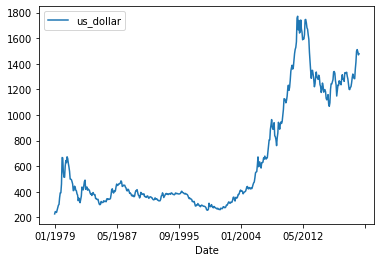

In [ ]:
data.plot('Date','us_dollar')

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                492 non-null    datetime64[ns]
 1   Inflation_Value     492 non-null    float64       
 2   dollar_index        492 non-null    float64       
 3   us_dollar           492 non-null    float64       
 4   pound               492 non-null    float64       
 5   indian_rupee        492 non-null    float64       
 6   south_african_rand  492 non-null    float64       
 7   australian_dollar   492 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 30.9 KB


In [ ]:
data['Date']

0     1979-01-01
1     1979-02-01
2     1979-03-01
3     1979-04-01
4     1979-05-01
         ...    
487   2019-08-01
488   2019-09-01
489   2019-10-01
490   2019-11-01
491   2019-12-01
Name: Date, Length: 492, dtype: datetime64[ns]

In [ ]:
data = pd.DataFrame(data['us_dollar']).set_index(data['Date'])

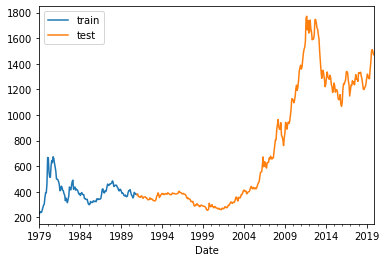

In [ ]:
time = pd.Timestamp('1990-12')
train = data.loc[:time,['us_dollar']]
test = data.loc[time:,['us_dollar']]

ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

In [ ]:
for s in range(0, 10):
    train['shift_{}'.format(s)] = train['us_dollar'].shift(s)
    test['shift_{}'.format(s)] = test['us_dollar'].shift(s)

train.head(10)

,us_dollar,shift_0,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9
Date,,,,,,,,,,,
1979-01-01,227.290909,227.290909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979-02-01,245.690000,245.690000,227.290909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979-03-01,242.063636,242.063636,245.690000,227.290909,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979-04-01,238.685714,238.685714,242.063636,245.690000,227.290909,NaN,NaN,NaN,NaN,NaN,NaN
1979-05-01,257.800000,257.800000,238.685714,242.063636,245.690000,227.290909,NaN,NaN,NaN,NaN,NaN
1979-06-01,279.085714,279.085714,257.800000,238.685714,242.063636,245.690000,227.290909,NaN,NaN,NaN,NaN
1979-07-01,294.763636,294.763636,279.085714,257.800000,238.685714,242.063636,245.690000,227.290909,NaN,NaN,NaN
1979-08-01,301.447826,301.447826,294.763636,279.085714,257.800000,238.685714,242.063636,245.690000,227.290909,NaN,NaN
1979-09-01,355.130000,355.130000,301.447826,294.763636,279.085714,257.800000,238.685714,242.063636,245.690000,227.290909,NaN


In [ ]:
X_train = train.dropna().drop('us_dollar', axis=1)
y_train = train.dropna()[['us_dollar']]

X_test = test.dropna().drop('us_dollar', axis=1)
y_test = test.dropna()[['us_dollar']]


X_train_t = X_train.values.reshape(X_train.values.shape[0], 10, 1)
X_test_t = X_test.values.reshape(X_test.values.shape[0], 10, 1)
X_train_t.shape

(135, 10, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation
import random as python_random
import tensorflow as tf

np.random.seed(42)
python_random.seed(42)
tf.random.set_seed(42)

model = Sequential()
model.add(LSTM(100, input_shape=(10,1), activation='gelu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train_t, y_train, epochs=1000, batch_size=128)

Epoch 1/1000
2/2 [==============================] - 22s 13ms/step - loss: 114791.0052
Epoch 2/1000
2/2 [==============================] - 0s 12ms/step - loss: 90521.1823
Epoch 3/1000
2/2 [==============================] - 0s 13ms/step - loss: 70193.2188
Epoch 4/1000
2/2 [==============================] - 0s 12ms/step - loss: 46603.4753
Epoch 5/1000
2/2 [==============================] - 0s 13ms/step - loss: 27308.5234
Epoch 6/1000
2/2 [==============================] - 0s 220ms/step - loss: 10460.5426
Epoch 7/1000
2/2 [==============================] - 0s 14ms/step - loss: 2256.7055
Epoch 8/1000
2/2 [==============================] - 0s 12ms/step - loss: 4904.1781
Epoch 9/1000
2/2 [==============================] - 0s 16ms/step - loss: 7386.0319
Epoch 10/1000
2/2 [==============================] - 0s 12ms/step - loss: 7022.4982
Epoch 11/1000
2/2 [==============================] - 0s 12ms/step - loss: 4658.0698
Epoch 12/1000
2/2 [==============================] - 0s 14ms/step - loss: 24

In [ ]:
model.evaluate(X_test_t, y_test, batch_size=32)

11/11 [==============================] - 1s 5ms/step - loss: 418.0959


418.095947265625

In [ ]:
y_pred = model.predict(X_test_t, batch_size=32)
com = pd.DataFrame({'test' : y_test.us_dollar.values,
             'pred' : y_pred.reshape(-1)})

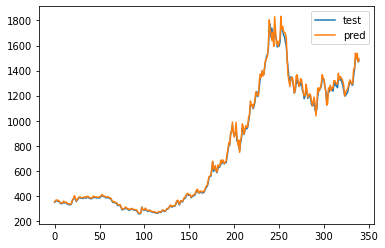

In [ ]:
ax = com.plot()
plt.legend(['test', 'pred'])

In [ ]:
arr = []
data = X_test_t[-1].reshape(-1)

for i in range(10):
    y_pred = model.predict(data.reshape(1,-1,1), batch_size=32)
    y_pred = y_pred.reshape(-1)[0]
    data = np.roll(data,1)
    arr.append(y_pred)
arr.insert(0, y_test.us_dollar[-1])
arr

[1478.645455,
 1493.9885,
 1293.2579,
 1240.962,
 1310.4916,
 1444.3708,
 1430.9756,
 1551.5703,
 1506.3888,
 1559.4489,
 1481.082]

In [ ]:
X = []
X.append(pd.Timestamp('2019-12'))
for i in range(0,10):
    X.append(pd.Timestamp('202'+str(i)+'-12'))
X

[Timestamp('2019-12-01 00:00:00'),
 Timestamp('2020-12-01 00:00:00'),
 Timestamp('2021-12-01 00:00:00'),
 Timestamp('2022-12-01 00:00:00'),
 Timestamp('2023-12-01 00:00:00'),
 Timestamp('2024-12-01 00:00:00'),
 Timestamp('2025-12-01 00:00:00'),
 Timestamp('2026-12-01 00:00:00'),
 Timestamp('2027-12-01 00:00:00'),
 Timestamp('2028-12-01 00:00:00'),
 Timestamp('2029-12-01 00:00:00')]

[Timestamp('2019-12-01 00:00:00'), Timestamp('2020-12-01 00:00:00'), Timestamp('2021-12-01 00:00:00'), Timestamp('2022-12-01 00:00:00'), Timestamp('2023-12-01 00:00:00'), Timestamp('2024-12-01 00:00:00'), Timestamp('2025-12-01 00:00:00'), Timestamp('2026-12-01 00:00:00'), Timestamp('2027-12-01 00:00:00'), Timestamp('2028-12-01 00:00:00'), Timestamp('2029-12-01 00:00:00')]


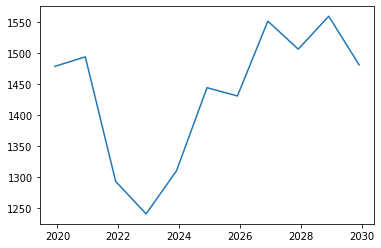

In [ ]:
print(X)
plt.plot(X[:],arr[:])